<a href="https://colab.research.google.com/github/lisettemalacon/neural-network-learning/blob/master/Complete%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

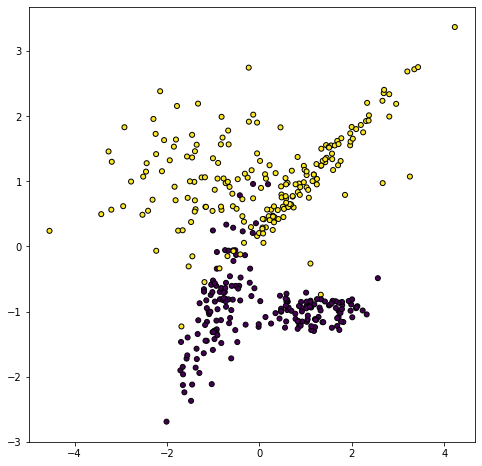

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import make_classification

np.random.seed(1)
X, Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

plt.figure(figsize=(8, 8))

#plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')
plt.show()

In [ ]:
def sigmoid(raw):
    """
    Compute the sigmoid of raw, a commonly used activation function for neural computation

    Arguments:
    raw -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(raw)
    """

    ### START CODE HERE ### (≈ 1 lines of code)
    s = 1 / (1+np.exp(-raw))
    ### END CODE HERE ###

    return s

In [ ]:
def initialize_network(n_x, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_y -- size of the output layer
    
    Returns:
    network -- python dictionary containing your network:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias vector of shape (n_y, 1)

    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    W = np.random.randn(n_y,n_x)
    b = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    
    network = {"W": W,
               "b": b}
    
    return network

In [ ]:
def forward_propagation(X, network):
    """
    Argument:
    X -- input data of size (n_x, n_samples)
    network -- python dictionary containing your weights and biases

   
    Returns:
    linA -- The raw product that comes from running Input X data through Weight W and Bias b
    A -- The sigmoidized activation value to be propagated
    activations -- a dictionary containing "linA" and "A".
    """

    # Retrieve each parameter from the dictionary "network"
    ### START CODE HERE ### (≈ 2 lines of code)
    product = np.dot(network['W'],X)
    linA = np.add(product, network['b'])
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate Activation
    A = sigmoid(linA)
    ### END CODE HERE ###
    
    assert(A.shape == (1, X.shape[1]))
    
    activations = {"linA": linA,
             "A": A}
    
    return A, activations

In [ ]:
#I changed something from previous assignment.
#I'm pushing the Normalization by number of samples into the Backprop
def evaluate(A, Y):
    """
    Arguments:
    A -- The sigmoid output of the second activation, of shape (1, number of samples)
    Y -- "true" labels vector of shape (1, number of samples)
    
    Returns:
    cost -- cross entropy cost: −∑(Y*log(A)+(1−Y)*log(1−A))
    """

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    cost = -np.sum(np.add(np.dot(Y,np.log(A.T)),np.dot(1-Y,np.log(1-A.T))))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [ ]:
#This value will be different from last time because of comment above
#Unit Testing
UT_network = initialize_network(2,1)

UT_A, UT_activations = forward_propagation(X.T, UT_network)
UT_Y = np.reshape(Y, (400,1))
UT_cost = evaluate(UT_A, UT_Y.T)

print("Cost value " + str(UT_cost))

#Expected: Cost value 348.4385161329101


Cost value 348.4385161329101


In [ ]:
def backward_propagation(activations, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    activations -- python dictionary containing our activations.
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Intermediate:
    ddlinA -- Gradient of Cost with respect to Linear Activation
    
    Returns:
    gradients -- python dictionary containing the gradients to be applied back to our network
    """

    # Retrieve also A from dictionary "activations".
    ### START CODE HERE ### (≈ 1 lines of code)
    A = activations['A'] # complete
    ### END CODE HERE ###
    
    # Backward propagation: calculate n_samples, ddlinA, ddW, ddb 
    ### START CODE HERE ### (≈ 4 lines of code)
    n_samples = X.shape[1]
    ddlinA = A - Y
    ddW = np.dot(ddlinA,X.T) / n_samples
    ddb = np.sum(ddlinA,axis=1,keepdims=True) / n_samples
    ### END CODE HERE ###
    
    assert(ddlinA.shape == (1, X.shape[1]))
    assert(ddW.shape == (Y.shape[0], X.shape[0]))
    assert(ddb.shape == (Y.shape[0], 1))
    gradients = {"ddW": ddW,
             "ddb": ddb}
    
    return gradients

In [ ]:

UT_gradients = backward_propagation(UT_activations, X.T, UT_Y.T)
print("Gradient values " + str(UT_gradients))

#Expected: Gradient values {'ddW': array([[ 0.19979757, -0.54888321]]), 'ddb': array([[0.00235057]])}


Gradient values {'ddW': array([[ 0.19979757, -0.54888321]]), 'ddb': array([[0.00235057]])}


In [ ]:
def learn(network, gradients, learning_rate):
    """
    Updates network using the gradient descent update rule given above
    
    Arguments:
    network -- python dictionary containing your network 
    gradients -- python dictionary containing your gradients 
    
    Returns:
    network -- python dictionary containing your updated network 
    """
    # Retrieve each parameter from the dictionary "network"
    ### START CODE HERE ### (≈ 2 lines of code)
    W = network['W']
    b = network['b']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "gradients"
    ### START CODE HERE ### (≈ 2 lines of code)
    ddW = gradients['ddW']
    ddb = gradients['ddb']
    ## END CODE HERE ###
    
    # Update rule for each parameter: You change the Network in an amount proportional to Gradients and Learning Rate
    ### START CODE HERE ### (≈ 2 lines of code)
    W -= np.dot(ddW,learning_rate) 
    b -= np.dot(ddb,learning_rate)
    ### END CODE HERE ###
    
    assert(W.shape == ddW.shape)
    assert(b.shape == ddb.shape)
    
    network = {"W": W,
              "b": b}
    
    return network

In [ ]:
print("Old Network values " + str(UT_network))
UT_network = learn(UT_network, UT_gradients, learning_rate = 1.2)
print("New Network values " + str(UT_network))

#Expected: Old Network values {'W': array([[ 0.4773024 , -0.24006957]]), 'b': array([[0.]])}
#Expected: New Network values {'W': array([[0.23754532, 0.41859028]]), 'b': array([[-0.00282069]])}
#Will change if run again

Old Network values {'W': array([[ 0.4773024 , -0.24006957]]), 'b': array([[0.]])}
New Network values {'W': array([[0.23754532, 0.41859028]]), 'b': array([[-0.00282069]])}


In [ ]:
def model(X, Y, num_iterations = 100, learning_rate=1.1, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)

    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    network -- network learnt by the model. They can then be used to predict.
    """
    
    n_x = X.shape[0]
    n_y = Y.shape[0] 
    costs = []

    # Initialize and retrieve Network. Get network, W, b
    ### START CODE HERE ### (≈ 3 lines of code)
    network = initialize_network(n_x,n_y)
    W = network['W']
    b = network['b']
    ### END CODE HERE ###
    
    # Loop - repeated exposure of Network to Data
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, network". Outputs: "A, activations".
        A,activations = forward_propagation(X,network)
        # Cost function. Inputs: "A, Y". Outputs: "cost".
        cost = evaluate(A,Y)
        # Backpropagation. Inputs: "activations, X, Y". Outputs: "gradients".
        gradients = backward_propagation(activations,X,Y)
        # Gradient descent parameter update. Inputs: "network, gradients". Outputs: "network".
        network = learn(network,gradients,learning_rate)
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations - for data visualization
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    #plot the cost - for data visualization
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate)) 
    plt.show()
    plt.clf()
    return network

Cost after iteration 0: 292.208516
Cost after iteration 1000: 60.123992
Cost after iteration 2000: 60.123992
Cost after iteration 3000: 60.123992
Cost after iteration 4000: 60.123992
Cost after iteration 5000: 60.123992
Cost after iteration 6000: 60.123992
Cost after iteration 7000: 60.123992
Cost after iteration 8000: 60.123992
Cost after iteration 9000: 60.123992


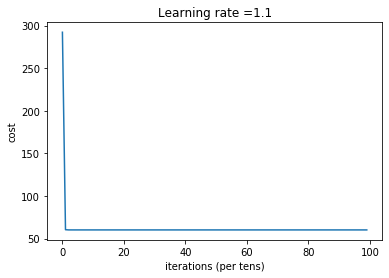

<Figure size 432x288 with 0 Axes>

In [ ]:
Y = np.reshape(Y, (400,1))
network = model(X.T, Y.T, num_iterations = 10000, learning_rate = 1.1, print_cost=True)

In [ ]:
def predict(network, X):
    """
    Using the learned network, predicts a class for each example in X
    
    Arguments:
    network -- python dictionary containing your network 
    X -- input data of size (n_x, n_samples)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A, activations = forward_propagation(X,network)
    predictions = np.where(A > 0.5,1,0)
    ### END CODE HERE ###
    
    return predictions

In [ ]:
predictions = predict(network, X.T)
print("Predictions " + str(predictions))

Predictions [[1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1
  1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
  0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0
  0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
  0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0
  1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
  1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
  1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1
  1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1
  0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
  0 1 1 0]]


In [ ]:
print ('Accuracy: %d' % float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.T.size)*100) + '%')

#Expected: 95%

Accuracy: 95%


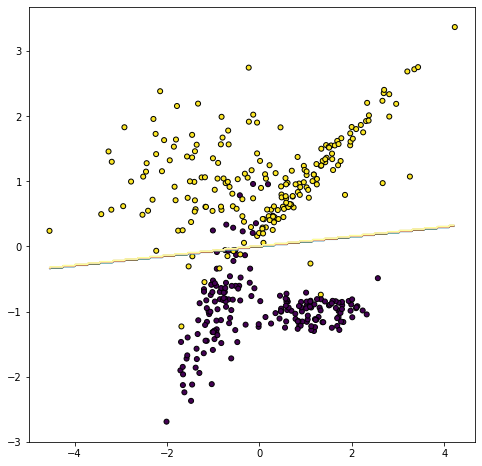

In [ ]:
plt.figure(figsize=(8, 8))

Y = np.reshape(Y, (400,))
#plt.title("One informative feature, one cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

#plt.figure(figsize=(8,8))

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#predictions = predict(network, X)
predictions = predict(network,(np.c_[xx.ravel(), yy.ravel()].T))
# Put the result into a color plot
predictions = predictions.reshape(xx.shape)

plt.contour(xx, yy, predictions, cmap=plt.cm.Paired)

plt.show()